<a href="https://colab.research.google.com/github/alokTripathi001-git/california_house_prediction_model/blob/main/california_housing_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
# import fireducks.pandas as pd
import pandas as pd
#import polars as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [82]:
import os        # folder/path banane ke liye
import tarfile # file ko extract karne ke liye hoti
import urllib   # file ko download karne ke liye
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 os.makedirs(housing_path, exist_ok=True)
 tgz_path = os.path.join(housing_path, "housing.tgz") # ye mere folder path  ko file ke name se jodta hain aur file path banata hain
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()

In [83]:
fetch_housing_data()       # function is called
def load_housing_data(housing_path=HOUSING_PATH):
 csv_path = os.path.join(housing_path, "housing.csv")
 return pd.read_csv(csv_path)

In [84]:
df=load_housing_data()
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [85]:
print(len(df))
df.columns

20640


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [87]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [88]:
print(len(df['longitude'].value_counts())),len(df['latitude'].value_counts())


844


(None, 862)

In [89]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [90]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [91]:
len(df[df['housing_median_age']==37])

537

In [92]:
sorted(df['housing_median_age'].value_counts(),reverse=True)

[1273,
 862,
 824,
 771,
 698,
 689,
 619,
 615,
 570,
 566,
 565,
 537,
 512,
 502,
 488,
 478,
 476,
 471,
 465,
 461,
 458,
 448,
 446,
 412,
 399,
 394,
 369,
 368,
 356,
 353,
 304,
 302,
 296,
 294,
 264,
 254,
 245,
 244,
 238,
 206,
 205,
 198,
 191,
 177,
 175,
 160,
 136,
 134,
 62,
 58,
 48,
 4]

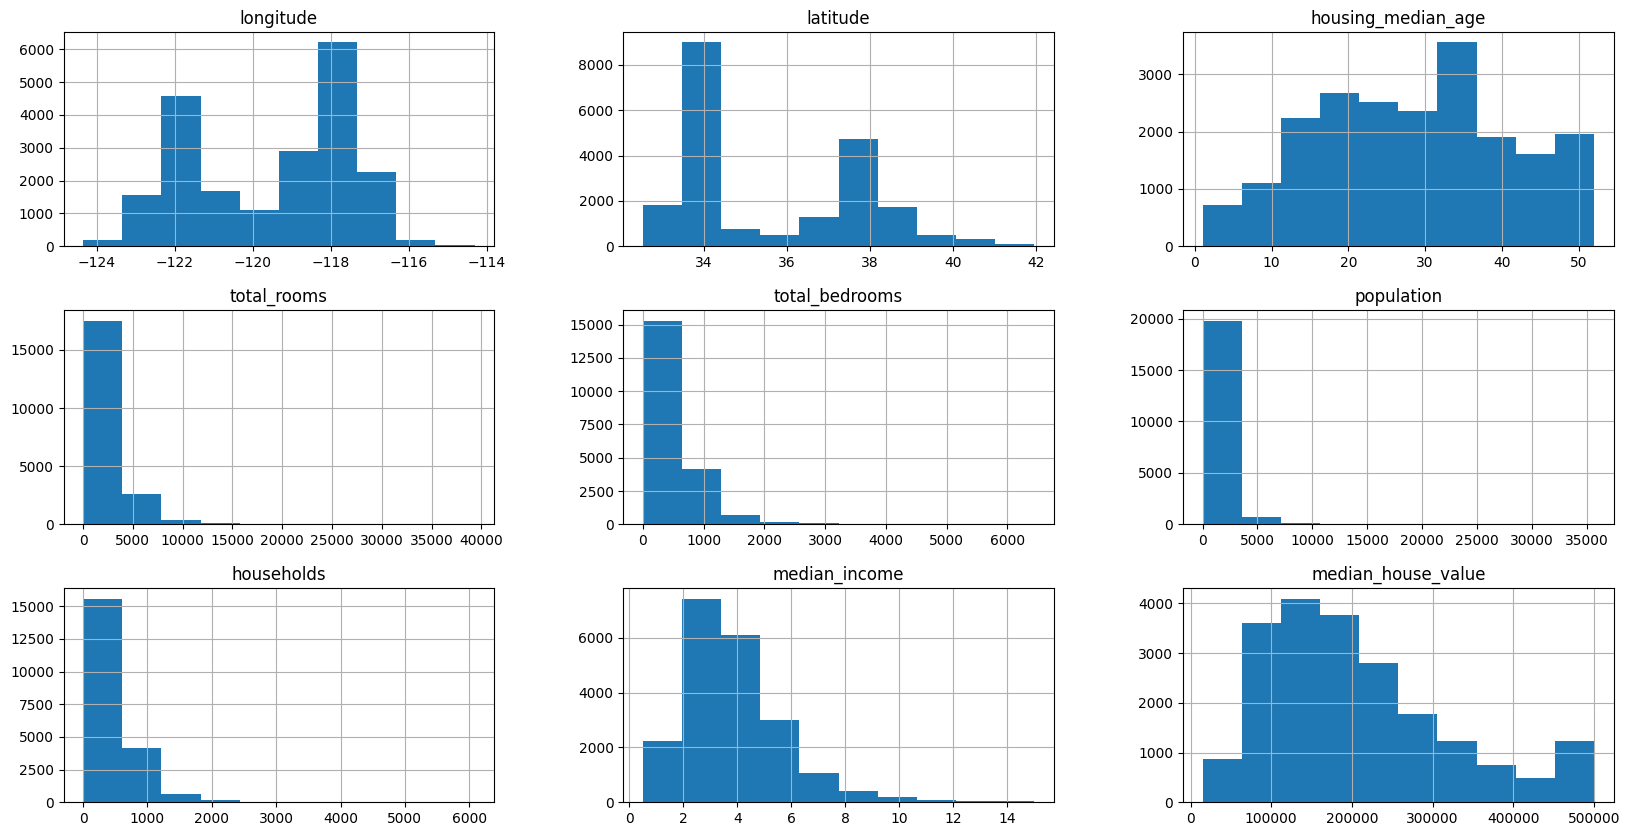

In [93]:
df.hist(figsize=(20,10))
plt.show()

In [94]:
df['total_bedrooms'].value_counts()

,count
total_bedrooms,
280.0,55
331.0,51
345.0,50
343.0,49
393.0,49
...,...
2009.0,1
2249.0,1
3114.0,1


In [95]:
# def splitting_the_dataset(df,test_ratio):
np.random.permutation(100) # it gives 100 different random 100 values

array([15, 98, 49, 54,  4, 72, 87,  1, 53, 27, 65, 35, 45, 71,  0, 74, 73,
       22, 59, 21, 91, 26, 42, 80, 92, 55, 75, 17, 51,  9,  3, 20, 68, 28,
       13, 12, 56, 30, 86, 79, 10,  8, 32,  5,  7, 14, 44, 85, 24, 62, 16,
       31, 64, 41, 99, 66, 96, 58, 48, 83, 39, 88, 50, 81, 90, 93, 57, 43,
       25,  6, 40, 95, 70, 11, 63, 67, 97, 52, 38, 61, 69, 60, 84, 33, 23,
       47, 34, 36, 18, 29, 19, 77, 78, 76,  2, 89, 82, 37, 46, 94])

Splitting Dataset on a specifif column

<Axes: >

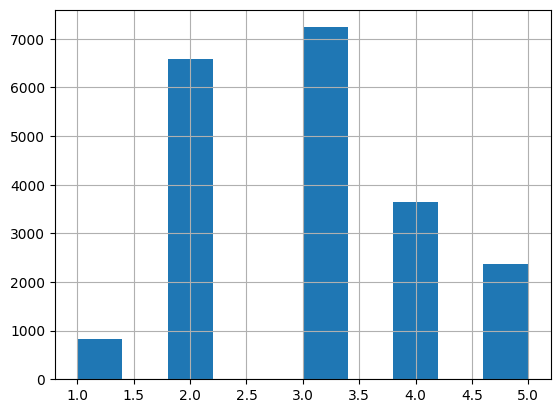

In [96]:
df["income_cat"] = pd.cut(df["median_income"],
 bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
 labels=[1, 2, 3, 4, 5])
df['income_cat'].hist()

In [97]:
a=df[df['median_income']<3.5]
max(a['median_income'])

3.4955

In [98]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


Splitting Training and Testing on basis of income_cat column

In [99]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):  # it gives me index of train and test part of dataset
 strat_train_set = df.loc[train_index]
 strat_test_set = df.loc[test_index]
len(strat_train_set),len(strat_test_set)

(16512, 4128)

In [100]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [101]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set) # both train and test are same in ratio

,count
income_cat,
3,0.350594
2,0.318859
4,0.176296
5,0.114462
1,0.039789


In [102]:
train_copy=strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

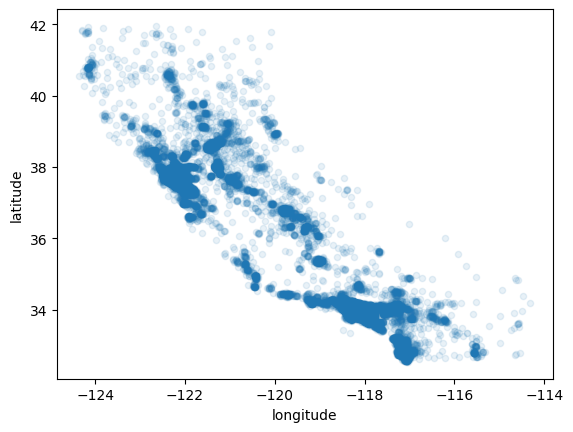

In [103]:
train_copy.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)

In [104]:
# train_copy.drop(columns=['income_cat'],inplace=True)

<Axes: xlabel='longitude', ylabel='latitude'>

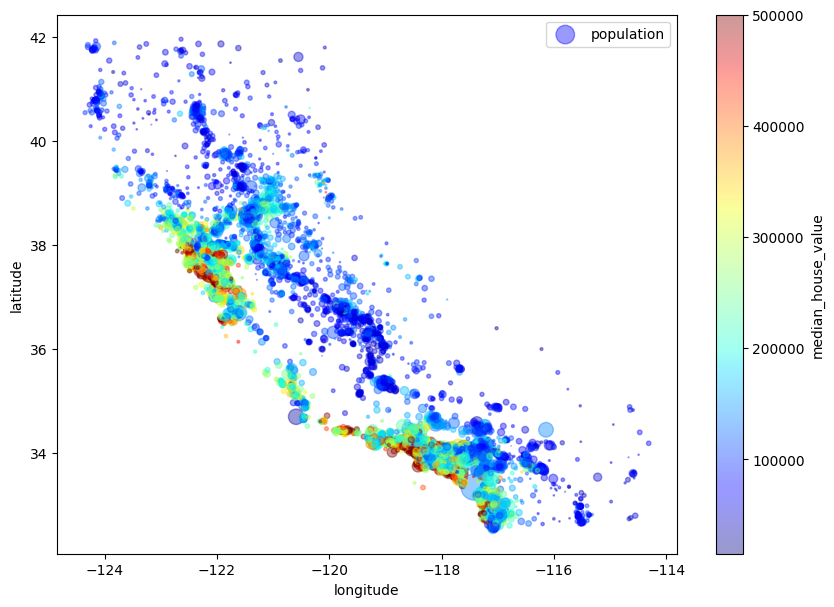

In [105]:
train_copy.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=train_copy["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)

In [106]:
corr_matrix = train_copy.drop(columns=['ocean_proximity','income_cat']).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population,-0.026882
longitude,-0.047466
latitude,-0.142673


<Axes: xlabel='median_income', ylabel='median_house_value'>

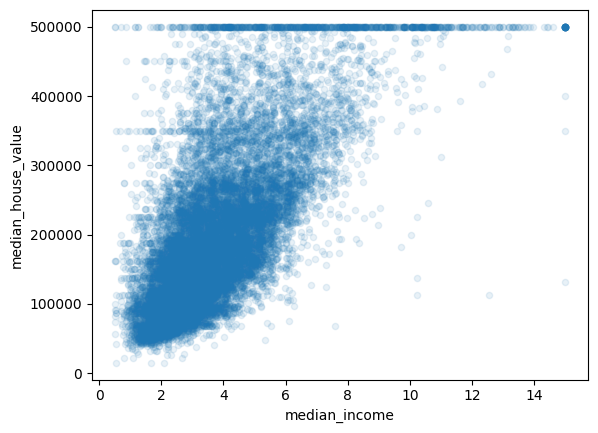

In [107]:
train_copy.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)

In [108]:
train_copy["rooms_per_household"] = train_copy["total_rooms"]/train_copy["households"]
train_copy["bedrooms_per_room"] = train_copy["total_bedrooms"]/train_copy["total_rooms"]
train_copy["population_per_household"]=train_copy["population"]/train_copy["households"]

In [109]:
corr_matrix=train_copy.drop(columns=['ocean_proximity']).corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687151
income_cat,0.642256
rooms_per_household,0.146255
total_rooms,0.135140
housing_median_age,0.114146
households,0.064590
total_bedrooms,0.047781
population_per_household,-0.021991
population,-0.026882


In [110]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()             # this is my output feature

In [111]:
housing.drop(columns=['income_cat'],inplace=True)

In [112]:
housing.isnull().sum()  # we have to fix anyhow null values inside total_bedrooms feature/column

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,158
population,0
households,0
median_income,0
ocean_proximity,0


In [113]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [114]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [115]:
# seeing every median value of column
imputer.statistics_                              # we will take care of every median as when model goes live we don't know which attribute median value is a nan value

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [116]:
X = imputer.transform(housing_num)
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [117]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
 index=housing_num.index)

In [118]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [119]:
housing_tr.isnull().sum() # this is a copy of housing

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0


In [120]:
# working with categorical columns

In [121]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [122]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded


# not to use ordinal encoder as it can create wrong or not good methods while training model

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [123]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [124]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [125]:
cat_encoder.categories_ # one hot encoding  alphabetical order par array banata hain aur fir us rank par use assign kar deta 1

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [126]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 # index
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self # nothing else to do
  def transform(self, X):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [127]:
# creating pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [128]:
from sklearn.compose import ColumnTransformer

'''Yeh allow karta hai ki alag-alag columns ko alag preprocessing steps se guzara jaaye.
Jaise:

Numeric columns ke liye scaling ya imputation

Categorical columns ke liye OneHotEncoding'''

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])


housing_prepared = full_pipeline.fit_transform(housing)

In [129]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [130]:
len(housing_prepared[0])

16

In [131]:
housing.iloc[0]

,12655
longitude,-121.46
latitude,38.52
housing_median_age,29.0
total_rooms,3873.0
total_bedrooms,797.0
population,2237.0
households,706.0
median_income,2.1736
ocean_proximity,INLAND


In [132]:
# model training
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)          #(input,output)

LinearRegression()

In [133]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

print("Labels:", list(some_labels))


Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [134]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
# calculating root mse
lin_rmse = np.sqrt(lin_mse)
print(lin_mse)
print(lin_rmse)
#68628.19819848922

4709785076.060029
68627.87390018745


In [135]:
# trying decision tree regressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [136]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

np.float64(0.0)

In [137]:
# doing K fold cross validation for validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10) # ye bhi kfoldcross validation hain jisme k = 10 hain
tree_rmse_scores = np.sqrt(-scores)

In [138]:
scores # this gives me score of every time when one fold was used for testing and other 9 was used for training for cross validation

array([-5.20613624e+09, -4.99272591e+09, -4.76599013e+09, -5.15515594e+09,
       -4.94917875e+09, -6.09092926e+09, -4.94234185e+09, -5.29701927e+09,
       -4.63010995e+09, -5.02755637e+09])

In [139]:
tree_rmse_scores

array([72153.5601221 , 70659.22380524, 69036.15088706, 71799.41464235,
       70350.3997926 , 78044.4056964 , 70301.79120536, 72780.62430799,
       68044.91128356, 70905.26333113])

In [140]:
# displying scores
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)                                                                                          #it's result is worse than linear regression

Scores: [72153.5601221  70659.22380524 69036.15088706 71799.41464235
 70350.3997926  78044.4056964  70301.79120536 72780.62430799
 68044.91128356 70905.26333113]
Mean: 71407.57450737957
Standard deviation: 2583.151206161366


In [141]:
# for linear regression
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-scores)                   # negative mse bhi jitna kam hoga utna accha hota as -4>-200
display_scores(lin_reg_rmse_scores)

'''Zyada negative (e.g. -5000)	🔴 Bura model
Kam negative (e.g. -1000)	🟢 Accha model'''

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180694


'Zyada negative (e.g. -5000)\t🔴 Bura model\nKam negative (e.g. -1000)\t🟢 Accha model'

In [142]:
# applying random Forest
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [143]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
random_forest_rmse_scores = np.sqrt(-scores)

display_scores(random_forest_rmse_scores)                 # it takes fucking lot of time (4m)

Scores: [51377.57940242 48960.18215069 46693.3625164  51715.36220128
 47432.43478006 51875.91666325 52711.14947226 49781.51656297
 48585.3353407  53641.61585406]
Mean: 50277.44549440865
Standard deviation: 2210.3770755623573


In [144]:
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},# total 4*3 = 12 combinations
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}, # total 2*3=6 combinatioins
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [145]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [146]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [147]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.79014980e-02, 6.59890191e-02, 4.18303436e-02, 1.68010635e-02,
       1.62292890e-02, 1.69755490e-02, 1.68102526e-02, 3.47083745e-01,
       5.27285322e-02, 1.06347273e-01, 7.67893501e-02, 1.36660306e-02,
       1.43603750e-01, 8.96568460e-05, 3.13792797e-03, 4.01671960e-03])

In [148]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs            # what is the importance of every column/feature
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.3470837452758007), 'median_income'),
 (np.float64(0.14360375002891454), 'INLAND'),
 (np.float64(0.10634727282545925), 'pop_per_hhold'),
 (np.float64(0.07790149798138864), 'longitude'),
 (np.float64(0.07678935008647712), 'bedrooms_per_room'),
 (np.float64(0.0659890190841065), 'latitude'),
 (np.float64(0.05272853217536024), 'rooms_per_hhold'),
 (np.float64(0.04183034355242352), 'housing_median_age'),
 (np.float64(0.016975548980635958), 'population'),
 (np.float64(0.016810252551291413), 'households'),
 (np.float64(0.016801063475181354), 'total_rooms'),
 (np.float64(0.01622928899665301), 'total_bedrooms'),
 (np.float64(0.013666030562534253), '<1H OCEAN'),
 (np.float64(0.004016719604084984), 'NEAR OCEAN'),
 (np.float64(0.0031379279736743894), 'NEAR BAY'),
 (np.float64(8.965684601416853e-05), 'ISLAND')]

In [149]:
# testing
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)

In [150]:
X_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,NEAR OCEAN,3


In [151]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) # => evaluates to 47,730.2

In [152]:
final_rmse

np.float64(47947.96978713138)

In [153]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(
    confidence,
    len(squared_errors) - 1,
    loc=squared_errors.mean(),
    scale=stats.sem(squared_errors)
))
''' 1. Model evaluation me certainty laata hai

Sirf ek RMSE number dekhne se achha hota hai ek range dekhna — jo bataye error kitna up-down ho sakta hai.

🔹 2. Model reliability samajhne me help karta hai

Agar range chhoti hai ➜ model stable hai
Agar range bahut badi hai ➜ model kaafi uncertain hai

🔹 3. Compare karne me easy hota hai

Do models ke confidence interval compare karke bata sakte ho kaunsa reliable hai'''

' 1. Model evaluation me certainty laata hai\n\nSirf ek RMSE number dekhne se achha hota hai ek range dekhna — jo bataye error kitna up-down ho sakta hai.\n\n🔹 2. Model reliability samajhne me help karta hai\n\nAgar range chhoti hai ➜ model stable hai\nAgar range bahut badi hai ➜ model kaafi uncertain hai\n\n🔹 3. Compare karne me easy hota hai\n\nDo models ke confidence interval compare karke bata sakte ho kaunsa reliable hai'

In [154]:
housing_tr_svr=housing_tr.copy()

In [155]:
housing_tr_svr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


From SCRATCH

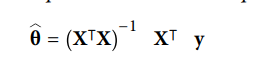

THE ABOVE IS FASTER THAN USING GRADINEENT DESCENT


To find the value of θ that minimizes the cost function, there is a closed-form solution
—in other words, a mathematical equation that gives the result directly. This is called
the Normal Equation

In [156]:
# linear regression
# y=m*x+c
x_mean=housing_tr['housing_median_age'].mean()
y_mean=housing_labels.mean()
weight_or_slope=np.sum((housing_tr['housing_median_age']-x_mean)*(housing_labels-y_mean))/np.sum((housing_tr['housing_median_age']-x_mean)**2)
print(weight_or_slope)
intercept=y_mean-(weight_or_slope*x_mean)

1050.260456073983


In [157]:
y_pred=weight_or_slope*housing_tr['housing_median_age']+intercept
print(y_pred)

12655    207369.338880
15502    184263.608847
2908     223123.245721
14053    202118.036600
20496    205268.817968
             ...      
15174    191615.432039
12661    192665.692495
19263    227324.287546
19140    191615.432039
19773    205268.817968
Name: housing_median_age, Length: 16512, dtype: float64


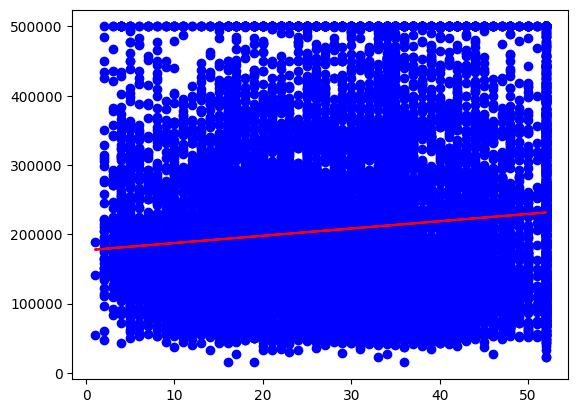

In [158]:
plt.scatter(housing_tr['housing_median_age'],housing_labels,c='blue')
plt.plot(housing_tr['housing_median_age'],y_pred,c='red')

In [159]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [160]:
X = 2 * np.random.rand(100, 1)     # 100 array dega dega random 0 se 1 ke beeche me value hogi
y = 4 + 3 * X + np.random.randn(100, 1)      #y=4+3x+noise

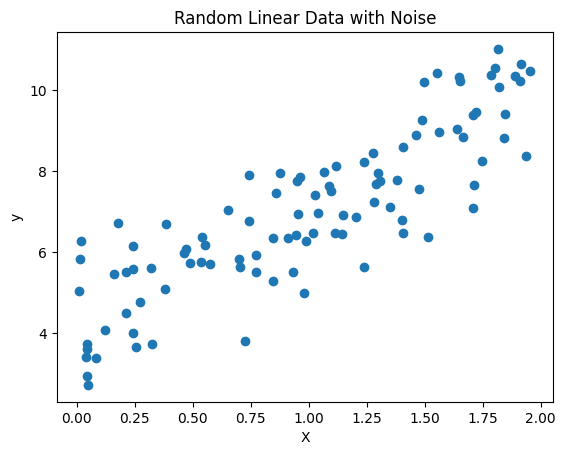

In [171]:
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Random Linear Data with Noise")
plt.show()


In [172]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [173]:
theta_best

array([[4.13812259],
       [2.89340604]])

In [174]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print(y_predict)                 # y=(2.89340604.x)+4.13812259            in  this case x comes one time as 0 and other as 2

[[4.13812259]
 [9.92493467]]


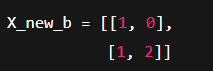

neeche vali image me 2nd column me jo 4 aur 3 hain vo example hain theta_best ke aur = ke baad y_predict hain

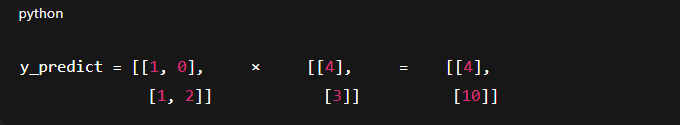

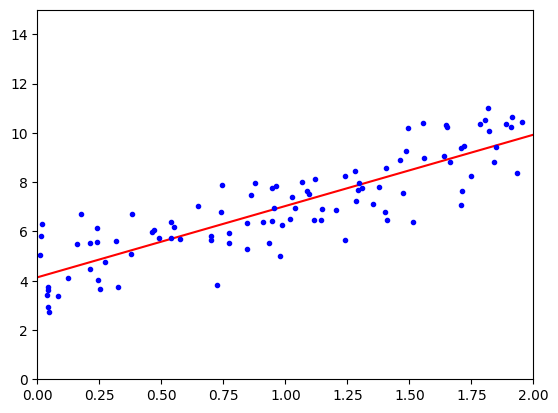

In [175]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [176]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

print(lin_reg.predict(X_new))

[4.13812259] [[2.89340604]]
[[4.13812259]
 [9.92493467]]
